## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


## Load Dataset

In [2]:
df =pd.read_csv("datasets/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


## Basic Data Understanding

In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##  Missing Values

In [4]:
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.fillna(df.mean(numeric_only=True),inplace=True)

## EDA

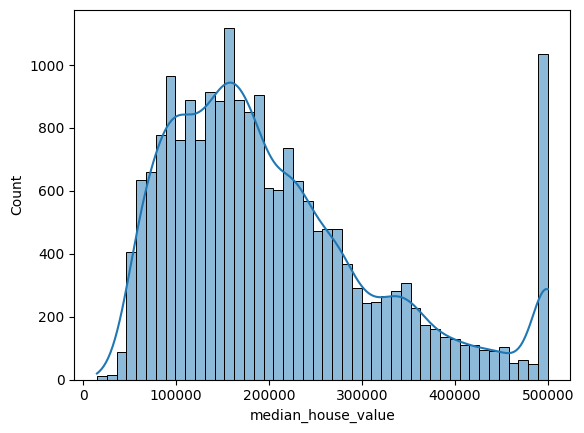

In [6]:
sns.histplot(df['median_house_value'],kde=True)
plt.show()

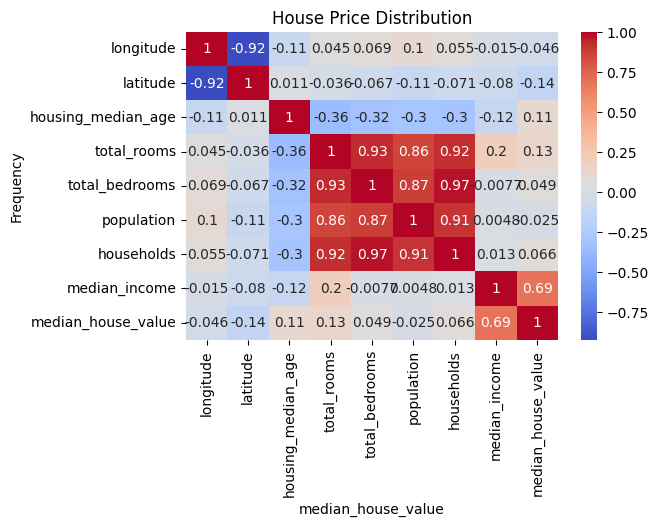

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("House Price Distribution")
plt.xlabel("median_house_value")

plt.ylabel("Frequency")
plt.show()

## Data Preprocessing

In [8]:
df_encoded=pd.get_dummies(df,drop_first=True)
df_encoded.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,True,False


In [9]:
x=df_encoded.drop('median_house_value',axis=1)
y=df_encoded['median_house_value']
x_train,x_test,y_tarin,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


## Model 1 - Linear Regression Model

In [14]:
model=LinearRegression()
model.fit(x_train,y_tarin)
y_pred=model.predict(x_test)

In [15]:
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

MAE: 50701.77903132993
MSE: 4904399775.949277
R2 Score: 0.6257351821159705


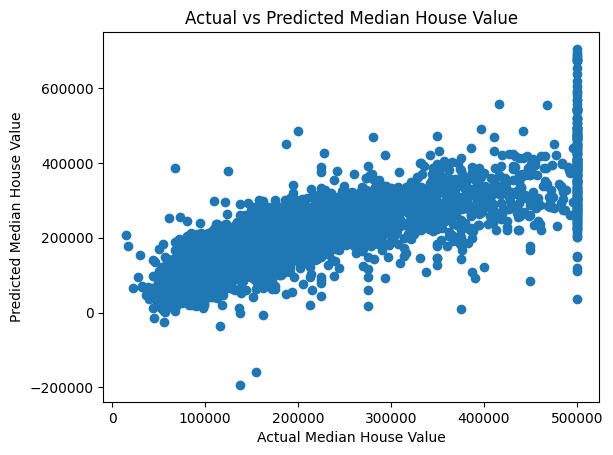

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred , alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Value")
plt.show()

## Model 2 - Random Forest 

In [ ]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_tarin)
y_pred_rf=rf_model.predict(x_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
mae_rf=mean_absolute_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)
print("Random Forest Regressor Performance:")
print("MAE:",mae_rf)
print("MSE:",mse_rf)
print("RMSE:",rmse_rf)
print("R2 Score:",r2_rf)
models={"Linear Regression":r2_score(y_test,y_pred),
        "Random Forest Regressor":r2_rf
        }


## Actual vs Predicted (Random Forest)


In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred_rf, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Value - Random Forest")
plt.show()

## Residual Plot

In [ ]:
residuals=y_test - y_pred_rf
plt.figure(figsize=(7,5))
plt.scatter(y_pred_rf,residuals, alpha=0.5)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel("Predicted Median House Value")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values - Random Forest")
plt.show()

## Feature Importance 

In [ ]:
importances=rf_model.feature_importances_
feature_names=X.columns
feature_importance_df=pd.DataFrame({'Feature':feature_names,'Importance':importances
}).sort_values(by="Importance",ascending=False)
print(feature_importance_df.head(10))



## Model Comparison Table

In [ ]:
results=pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regression"],
    "RMSE": [rmse_lr, rmse_rf],
    "MAE": [mae_lr, mae_rf],
    "R2 Score": [r2_lr, r2_rf]
})